In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data0 = pd.read_csv('delhivery_data.csv')

In [5]:
data0.shape

(144867, 24)

In [6]:
data0.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
data1 = data0.drop(['data','route_schedule_uuid','start_scan_to_end_scan','is_cutoff','start_scan_to_end_scan','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_actual_time','segment_osrm_time','segment_osrm_distance','segment_factor'], axis=1)
data1.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance'],
      dtype='object')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   trip_uuid                       144867 non-null  object 
 3   source_center                   144867 non-null  object 
 4   source_name                     144574 non-null  object 
 5   destination_center              144867 non-null  object 
 6   destination_name                144606 non-null  object 
 7   od_start_time                   144867 non-null  object 
 8   od_end_time                     144867 non-null  object 
 9   actual_distance_to_destination  144867 non-null  float64
 10  actual_time                     144867 non-null  float64
 11  osrm_time                       144867 non-null  float64
 12  osrm_distance   

In [9]:
data1.describe()

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000
mean,234.073372,416.927527,213.868272,284.771297
std,344.990009,598.103621,308.011085,421.119294
min,9.000045,9.000000,6.000000,9.008200
25%,23.355874,51.000000,27.000000,29.914700
50%,66.126571,132.000000,64.000000,78.525800
75%,286.708875,513.000000,257.000000,343.193250
max,1927.447705,4532.000000,1686.000000,2326.199100


In [10]:
data1.describe(include=['object'])

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,14817,2,14817,1508,1498,1481,1468,26369,26369
top,2018-09-28 05:23:15.359220,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,101,99660,101,23347,23347,15192,15192,81,81


In [11]:
data1['trip_creation_time'] = pd.to_datetime(data1['trip_creation_time'])
data1['od_start_time'] = pd.to_datetime(data1['od_start_time'])
data1['od_end_time'] = pd.to_datetime(data1['od_end_time'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   trip_uuid                       144867 non-null  object        
 3   source_center                   144867 non-null  object        
 4   source_name                     144574 non-null  object        
 5   destination_center              144867 non-null  object        
 6   destination_name                144606 non-null  object        
 7   od_start_time                   144867 non-null  datetime64[ns]
 8   od_end_time                     144867 non-null  datetime64[ns]
 9   actual_distance_to_destination  144867 non-null  float64       
 10  actual_time                     144867 non-null  float64

In [12]:
data1

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,10.435660,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,18.936842,24.0,20.0,21.7243
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,27.637279,40.0,28.0,32.5395
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,36.118028,62.0,40.0,45.5620
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,39.386040,68.0,44.0,54.2181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,45.258278,94.0,60.0,67.9280
144863,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,54.092531,120.0,76.0,85.6829
144864,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,66.163591,140.0,88.0,97.0933
144865,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,73.680667,158.0,98.0,111.2709


In [13]:
data1.isnull().sum()

,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0
od_end_time,0
actual_distance_to_destination,0


In [14]:
miss_cat = ['source_name','destination_name']
freq_imputer = SimpleImputer(strategy='most_frequent')
for col in miss_cat:
  data1[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data1[col])))

data1.isnull().sum()

,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0
actual_distance_to_destination,0


In [15]:
df = data1.copy()

In [16]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance'],
      dtype='object')

In [17]:
df_1 = df.groupby(['trip_uuid','source_center','destination_center']).agg({'trip_creation_time':'first','route_type':'first','source_name':'first','destination_name':'last','od_start_time':'first','od_end_time':'last','actual_distance_to_destination':'max','actual_time':'max','osrm_time':'max','osrm_distance':'max'})
df_1

trip_creation_time  \
trip_uuid               source_center destination_center                              
trip-153671041653548748 IND209304AAA  IND000000ACB       2018-09-12 00:00:16.535741   
                        IND462022AAA  IND209304AAA       2018-09-12 00:00:16.535741   
trip-153671042288605164 IND561203AAB  IND562101AAA       2018-09-12 00:00:22.886430   
                        IND572101AAA  IND561203AAB       2018-09-12 00:00:22.886430   
trip-153671043369099517 IND000000ACB  IND160002AAC       2018-09-12 00:00:33.691250   
...                                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA       2018-10-03 23:59:14.390954   
                        IND628613AAA  IND627005AAA       2018-10-03 23:59:14.390954   
                        IND628801AAA  IND628204AAA       2018-10-03 23:59:14.390954   
trip-153861118270144424 IND583119AAA  IND583101AAA       2018-10-03 23:59:42.701692   
                        IND583201AAA  IND583119AAA       2018-10-03 23:59:42.701692   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671042288605164 IND561203AAB  IND562101AAA          Carting   
                        IND572101AAA  IND561203AAB          Carting   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA          Carting   
                        IND628613AAA  IND627005AAA          Carting   
                        IND628801AAA  IND628204AAA          Carting   
trip-153861118270144424 IND583119AAA  IND583101AAA              FTL   
                        IND583201AAA  IND583119AAA              FTL   

                                                                                 source_name  \
trip_uuid               source_center destination_center                                       
trip-153671041653548748 IND209304AAA  IND000000ACB        Kanpur_Central_H_6 (Uttar Pradesh)   
                        IND462022AAA  IND209304AAA        Bhopal_Trnsport_H (Madhya Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA         Doddablpur_ChikaDPP_D (Karnataka)   
                        IND572101AAA  IND561203AAB             Tumkur_Veersagr_I (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC             Gurgaon_Bilaspur_HB (Haryana)   
...                                                                                      ...   
trip-153861115439069069 IND628204AAA  IND627657AAA        Tirchchndr_Shnmgprm_D (Tamil Nadu)   
                        IND628613AAA  IND627005AAA         Peikulam_SriVnktpm_D (Tamil Nadu)   
                        IND628801AAA  IND628204AAA              Eral_Busstand_D (Tamil Nadu)   
trip-153861118270144424 IND583119AAA  IND583101AAA             Sandur_WrdN1DPP_D (Karnataka)   
                        IND583201AAA  IND583119AAA                        Hospet (Karnataka)   

                                                                               destination_name  \
trip_uuid               source_center destination_center                                          
trip-153671041653548748 IND209304AAA  IND000000ACB                Gurgaon_Bilaspur_HB (Haryana)   
                        IND462022AAA  IND209304AAA           Kanpur_Central_H_6 (Uttar Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA            Chikblapur_ShntiSgr_D (Karnataka)   
                        IND572101AAA  IND561203AAB            Doddablpur_ChikaDPP_D (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC               Chandigarh_Mehmdpur_H (Punjab)   
...                                                                

In [18]:
df_1 = df.groupby('trip_uuid').agg({'trip_creation_time':'first','route_type':'first','source_name':'first','destination_name':'last','od_start_time':'first','od_end_time':'last','actual_distance_to_destination':'max','actual_time':'max','osrm_time':'max','osrm_distance':'max','source_center':'first','destination_center':'last'})
df_1 = df_1.reset_index()
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_center,destination_center
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,544.8027,IND462022AAA,IND000000ACB
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,56.9116,IND572101AAA,IND562101AAA
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,2090.8743,IND562132AAA,IND160002AAC
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,19.6800,IND400072AAB,IND401104AAA
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,63.6461,IND583101AAA,IND583101AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,44.5639,IND160002AAC,IND160002AAC
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,16.0882,IND121004AAB,IND121004AAA
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,32.2277,IND209304AAA,IND209304AAA
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,52.8070,IND627005AAA,IND627005AAA


In [19]:
df_1[['dest','dest_state']] = df_1['destination_name'].str.split('(',n=1,expand=True)
df_1['dest_state'] = df_1['dest_state'].str.rstrip(')')
df_1[['dest_city','dest_place','dest_code']] = df_1['dest'].str.split('_',n=2,expand=True)
df_1[['soc','soc_state']] = df_1['source_name'].str.split('(',n=1,expand=True)
df_1['soc_state'] = df_1['soc_state'].str.rstrip(')')
df_1[['soc_city','soc_place','soc_code']] = df_1['soc'].str.split('_',n=2,expand=True)
df_1 = df_1.drop(['dest','soc'],axis=1)
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,...,source_center,destination_center,dest_state,dest_city,dest_place,dest_code,soc_state,soc_city,soc_place,soc_code
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,...,IND462022AAA,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,Madhya Pradesh,Bhopal,Trnsport,H
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,...,IND572101AAA,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,...,IND562132AAA,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Karnataka,Bangalore,Nelmngla,H
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,...,IND400072AAB,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,...,IND583101AAA,IND583101AAA,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,...,IND160002AAC,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,...,IND121004AAB,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,...,IND209304AAA,IND209304AAA,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,...,IND627005AAA,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_type                      14817 non-null  object        
 3   source_name                     14817 non-null  object        
 4   destination_name                14817 non-null  object        
 5   od_start_time                   14817 non-null  datetime64[ns]
 6   od_end_time                     14817 non-null  datetime64[ns]
 7   actual_distance_to_destination  14817 non-null  float64       
 8   actual_time                     14817 non-null  float64       
 9   osrm_time                       14817 non-null  float64       
 10  osrm_distance                   14817 non-null  float64       
 11  so

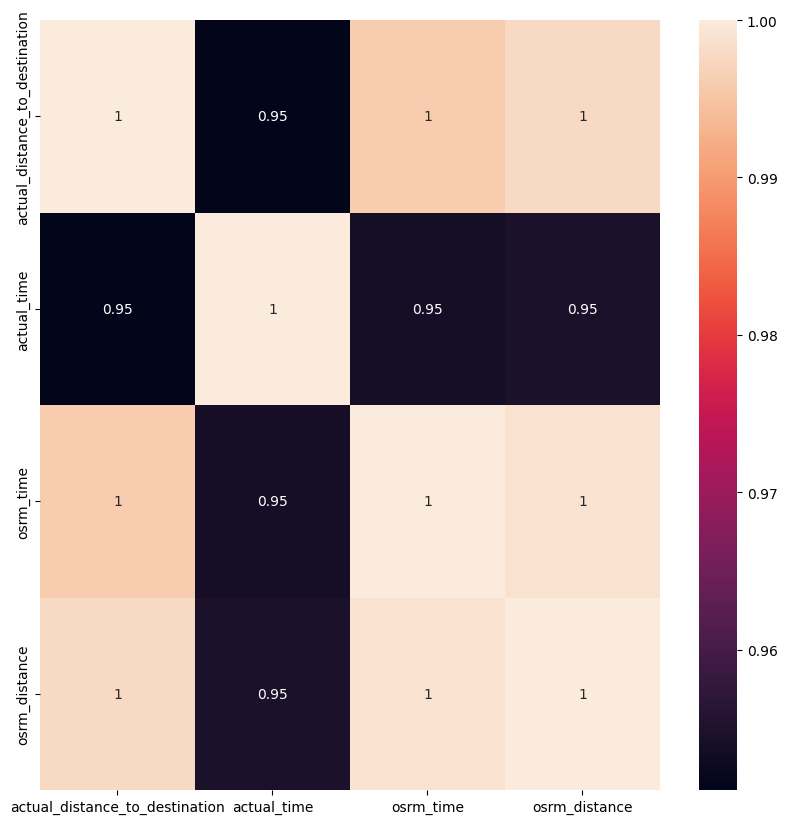

In [21]:
num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_1[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

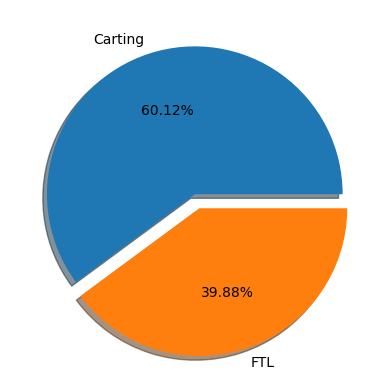

In [22]:
plt.pie(data=df_1,x=df_1['route_type'].value_counts(),shadow=True,labels=['Carting','FTL'],explode=(0,0.1),autopct='%0.2f%%')
plt.show()

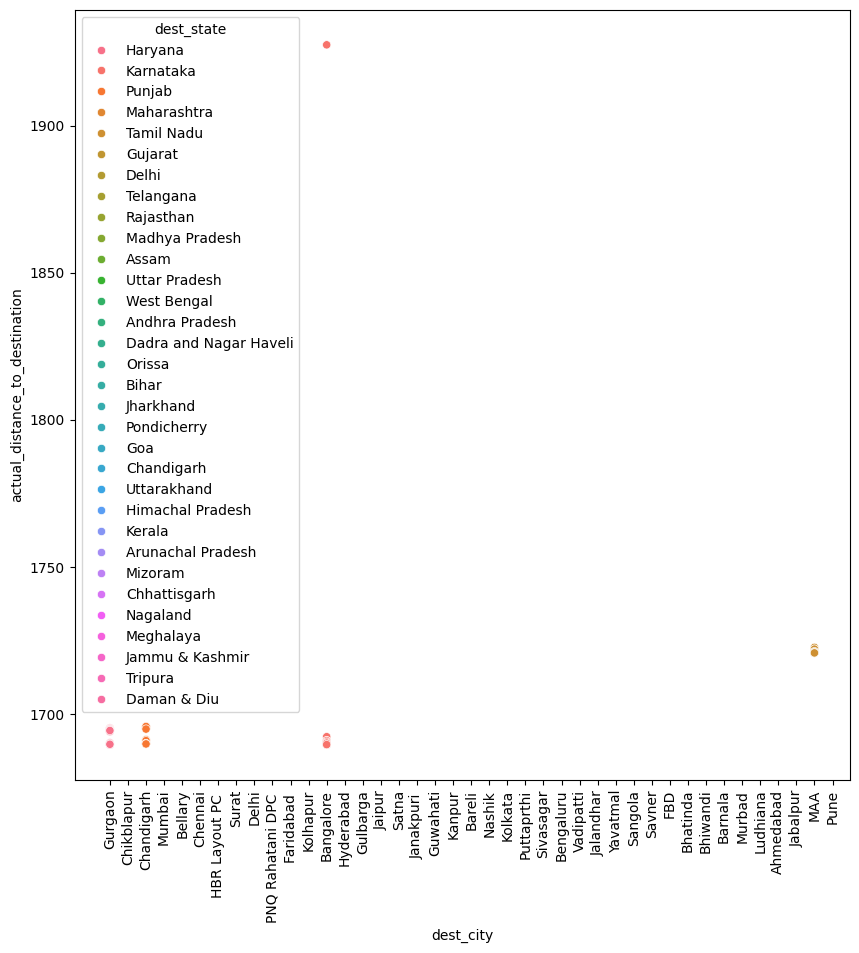

In [23]:
y=df_1['actual_distance_to_destination'].sort_values(ascending=False).head(100).to_frame()
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_1['dest_city'],y=y['actual_distance_to_destination'],hue=df_1['dest_state'])
plt.xticks(rotation=90)
plt.show()

In [24]:
x=df_1.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,dest_state,trip_uuid
0,Maharashtra,2591
1,Karnataka,2275
2,Haryana,1697
3,Tamil Nadu,1072
4,Telangana,838
5,Gujarat,746
6,Uttar Pradesh,728
7,West Bengal,708
8,Punjab,693
9,Delhi,675


<Axes: xlabel='dest_state'>

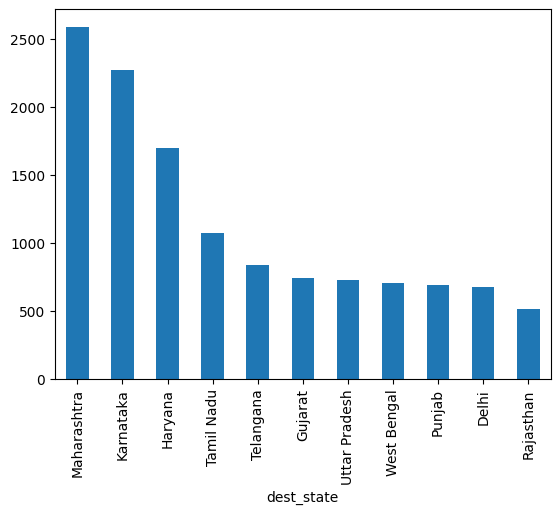

In [25]:
df_1.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

In [26]:
y=df_1.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
y

,dest_place,dest_state,trip_uuid
0,Bilaspur,Haryana,886
1,Nelmngla,Karnataka,628
2,Mankoli,Maharashtra,604
3,Shamshbd,Telangana,459
4,Mehmdpur,Punjab,434
5,Kundli,Haryana,372
6,Bomsndra,Karnataka,315
7,Tathawde,Maharashtra,288
8,KGAirprt,Karnataka,278
9,East,Gujarat,257


<Axes: xlabel='dest_place,dest_state'>

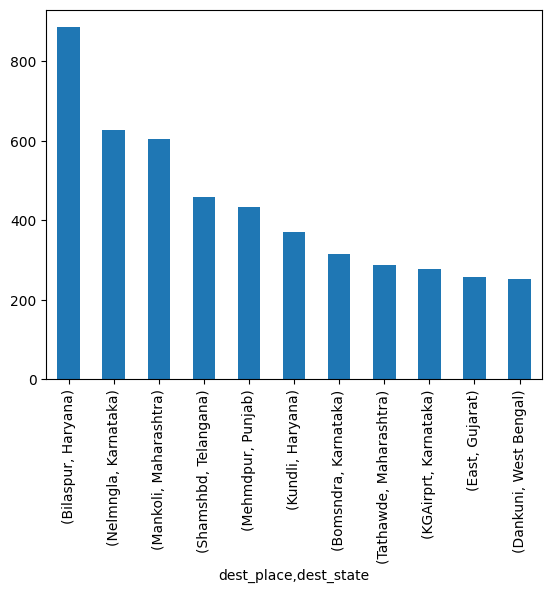

In [27]:
df_1.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

<Axes: xlabel='dest_place'>

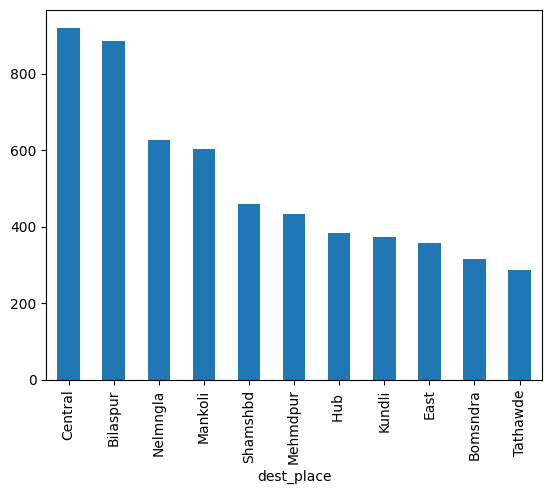

In [28]:
df_1.groupby('dest_place')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


<Axes: xlabel='soc_place,soc_state'>

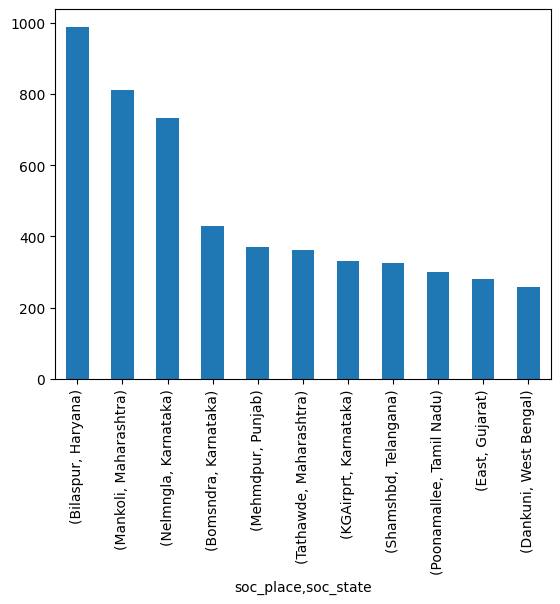

In [29]:
df_1.groupby(['soc_place','soc_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


In [30]:
h=df_1.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
h

,dest_city,dest_state,trip_uuid
0,Bengaluru,Karnataka,1056
1,Gurgaon,Haryana,899
2,Mumbai,Maharashtra,891
3,Bangalore,Karnataka,646
4,Hyderabad,Telangana,630
5,Bhiwandi,Maharashtra,604
6,Delhi,Delhi,576
7,Chandigarh,Punjab,434
8,Chennai,Tamil Nadu,388
9,Sonipat,Haryana,375


<Axes: xlabel='dest_city,dest_state'>

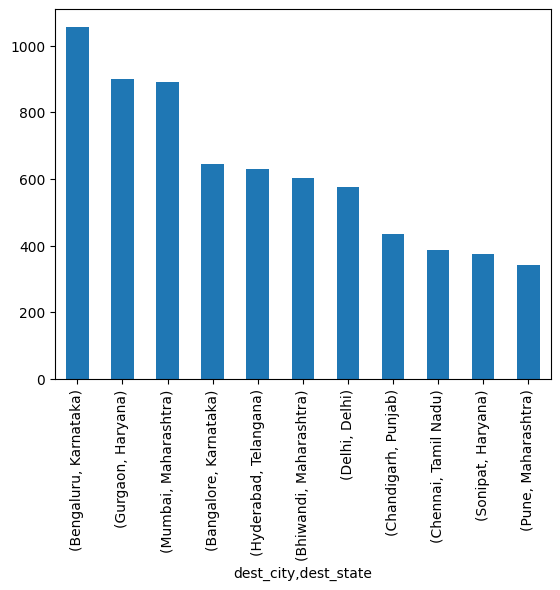

In [31]:
df_1.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


In [32]:
h=df_1.groupby(['soc_city','soc_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
h

,soc_city,soc_state,trip_uuid
0,Gurgaon,Haryana,1043
1,Bengaluru,Karnataka,1015
2,Bhiwandi,Maharashtra,811
3,Bangalore,Karnataka,755
4,Delhi,Delhi,620
5,Mumbai,Maharashtra,579
6,Hyderabad,Telangana,562
7,Pune,Maharashtra,445
8,Chandigarh,Punjab,370
9,Kolkata,West Bengal,339


<Axes: xlabel='soc_city,soc_state'>

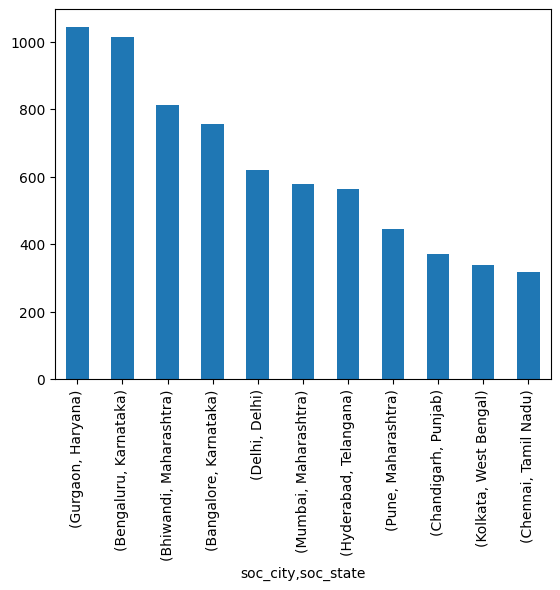

In [33]:
df_1.groupby(['soc_city','soc_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


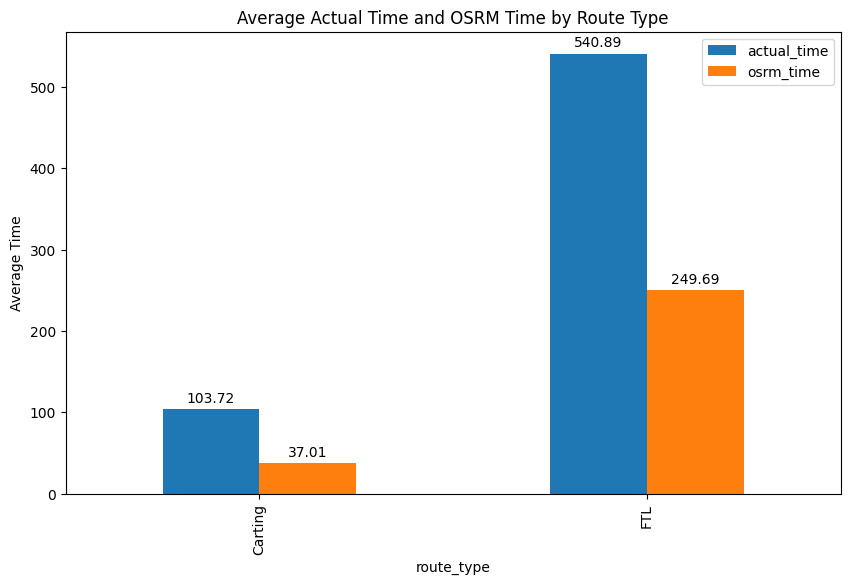

In [51]:
agg_data = df_1.groupby('route_type').agg({'actual_time': 'mean', 'osrm_time': 'mean'})
ax = agg_data.plot(kind='bar', figsize=(10, 6))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.title('Average Actual Time and OSRM Time by Route Type')
plt.ylabel('Average Time')

plt.show()

<Axes: xlabel='soc_state'>

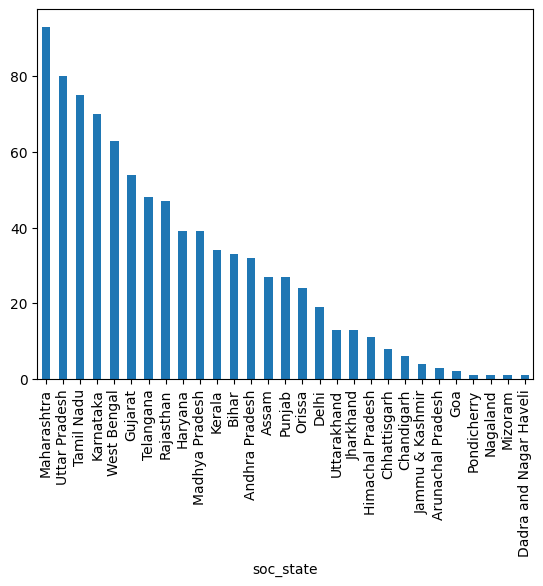

In [35]:
df_1.groupby('soc_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='dest_state'>

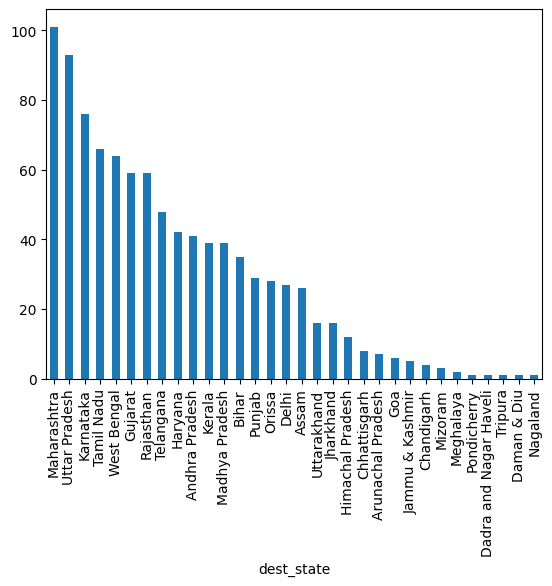

In [36]:
df_1.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False).plot(kind='bar')


In [37]:
df_1['weekday'] = df_1['trip_creation_time'].dt.day_name()
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,...,destination_center,dest_state,dest_city,dest_place,dest_code,soc_state,soc_city,soc_place,soc_code,weekday
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,...,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,Madhya Pradesh,Bhopal,Trnsport,H,Wednesday
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,...,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I,Wednesday
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,...,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Karnataka,Bangalore,Nelmngla,H,Wednesday
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,...,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,None,None,Wednesday
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,...,IND583101AAA,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,...,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,Wednesday
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,...,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC,Wednesday
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,...,IND209304AAA,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6,Wednesday
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,...,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Wednesday


In [38]:
x=df_1['weekday'].value_counts().to_frame('count').reset_index()
x

,weekday,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


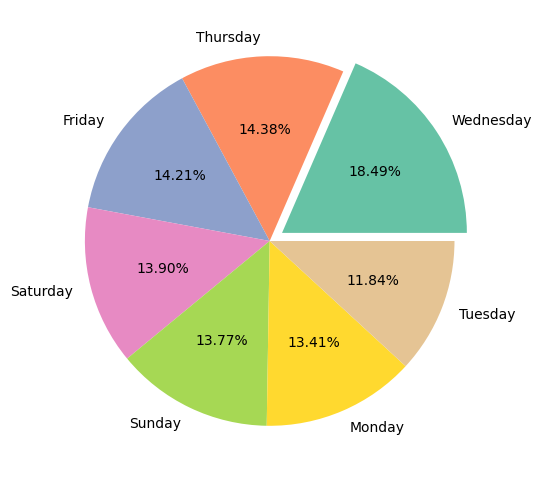

In [39]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(x=x['count'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.show()

In [40]:
x1=df_1.groupby('soc_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['soc_state'], value_vars=['actual_time', 'osrm_time'])
x1

,soc_state,variable,value
0,Andhra Pradesh,actual_time,162.402948
1,Arunachal Pradesh,actual_time,429.250000
2,Assam,actual_time,499.739927
3,Bihar,actual_time,352.952381
4,Chandigarh,actual_time,111.333333
5,Chhattisgarh,actual_time,159.395349
6,Dadra and Nagar Haveli,actual_time,48.333333
7,Delhi,actual_time,323.812106
8,Goa,actual_time,412.600000
9,Gujarat,actual_time,238.990617


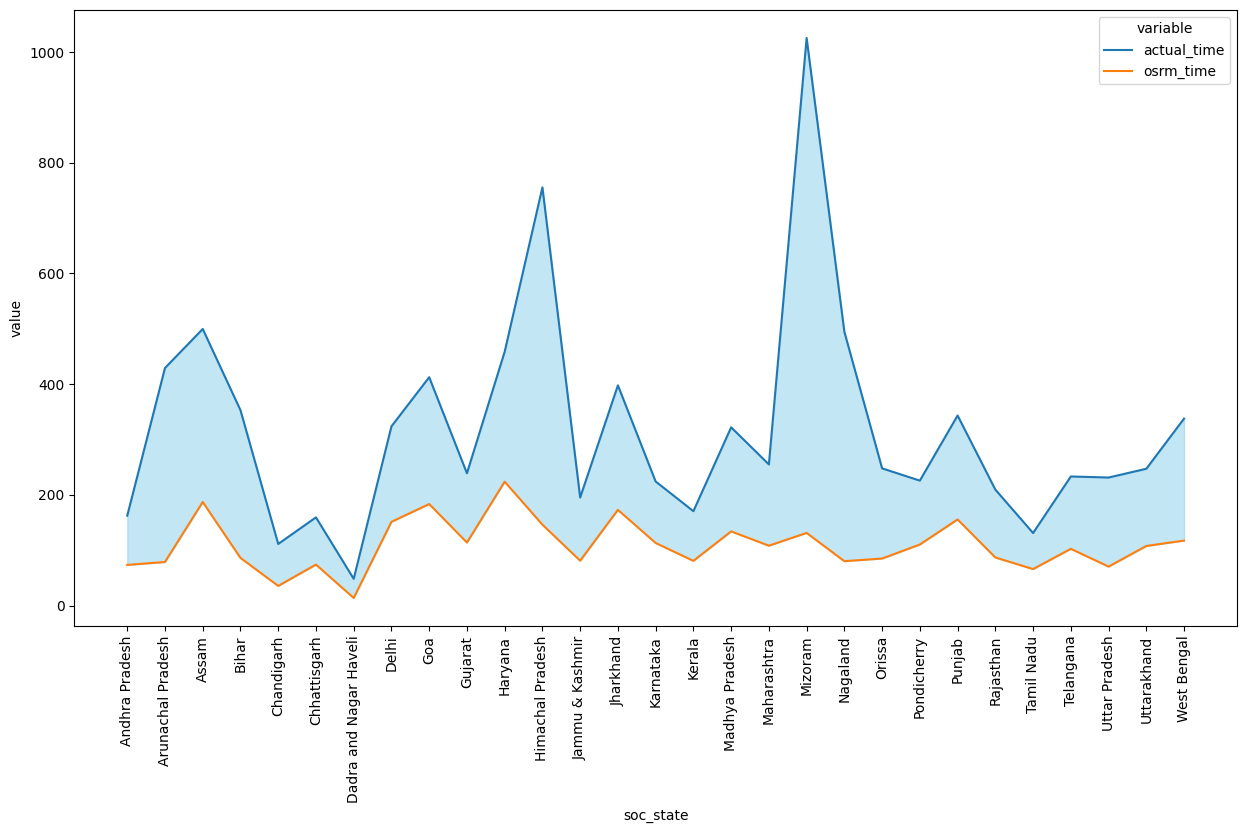

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='soc_state',y='value',hue='variable')
actual_time = df_1.groupby('soc_state')['actual_time'].mean().reset_index()['actual_time']
osrm_time = df_1.groupby('soc_state')['osrm_time'].mean().reset_index()['osrm_time']
x_fill = np.arange(len(actual_time))
plt.fill_between(x_fill, actual_time, osrm_time, where=(actual_time > osrm_time), color='skyblue', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [42]:
x1=df_1.groupby('soc_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['soc_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1

,soc_state,variable,value
0,Andhra Pradesh,actual_distance_to_destination,72.319235
1,Arunachal Pradesh,actual_distance_to_destination,77.150532
2,Assam,actual_distance_to_destination,184.203935
3,Bihar,actual_distance_to_destination,95.944080
4,Chandigarh,actual_distance_to_destination,32.061986
5,Chhattisgarh,actual_distance_to_destination,64.634942
6,Dadra and Nagar Haveli,actual_distance_to_destination,14.349976
7,Delhi,actual_distance_to_destination,160.180430
8,Goa,actual_distance_to_destination,166.366008
9,Gujarat,actual_distance_to_destination,121.877264


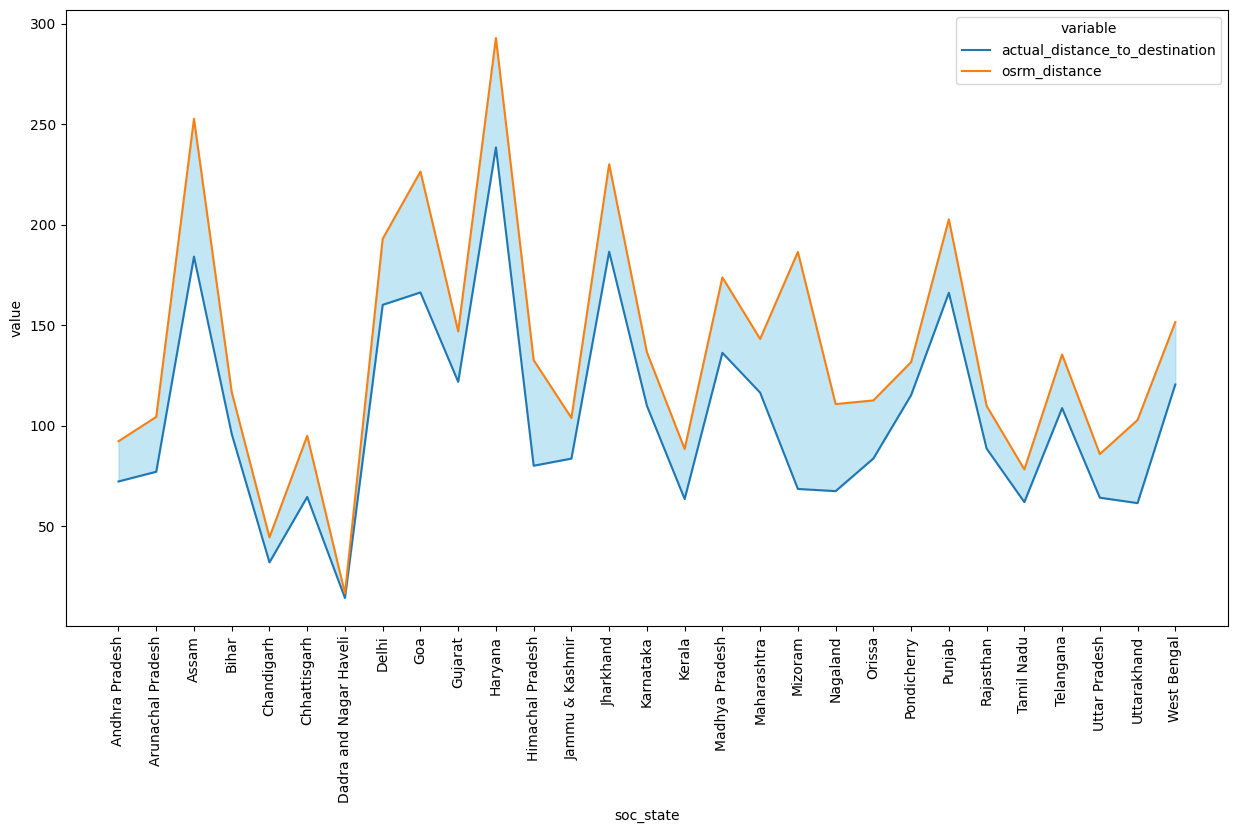

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='soc_state',y='value',hue='variable')
actual_distance = df_1.groupby('soc_state')['actual_distance_to_destination'].mean().reset_index()['actual_distance_to_destination']
osrm_distance = df_1.groupby('soc_state')['osrm_distance'].mean().reset_index()['osrm_distance']
x_fill = np.arange(len(actual_time))
plt.fill_between(x_fill, actual_distance, osrm_distance, where=(actual_time > osrm_time), color='skyblue', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

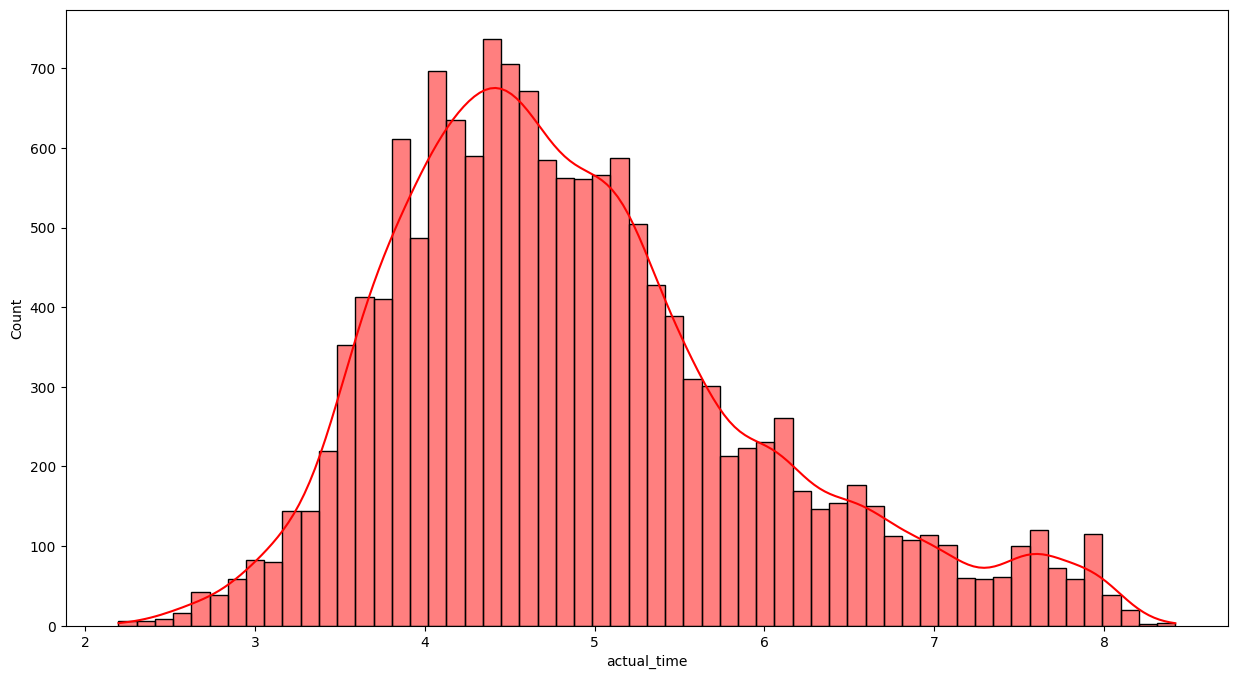

In [55]:
plt.figure(figsize=(15,8))
actual_time_log =np.log(df_1['actual_time'])
sns.histplot(x=actual_time_log, kde=True, color='red', alpha=0.5)
plt.show()

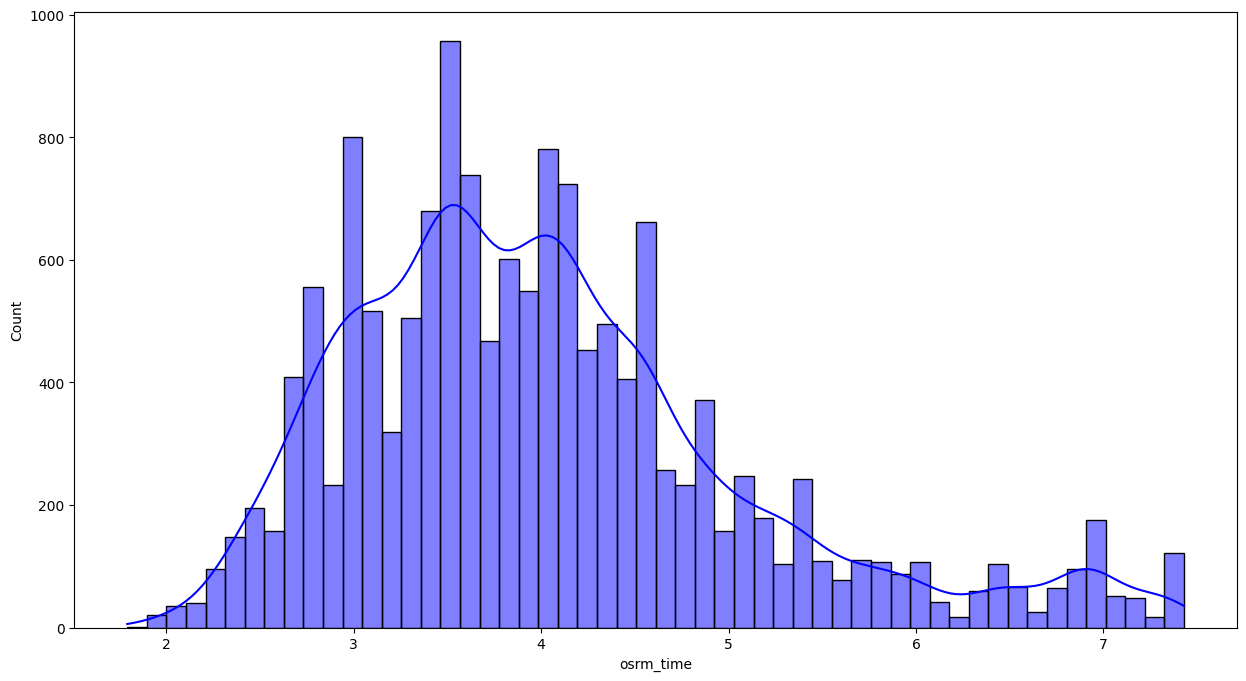

In [67]:
plt.figure(figsize=(15,8))
osrm_time_log =np.log(df_1['osrm_time'])
sns.histplot(x=osrm_time_log, kde=True, color='blue', alpha=0.5)
plt.show()

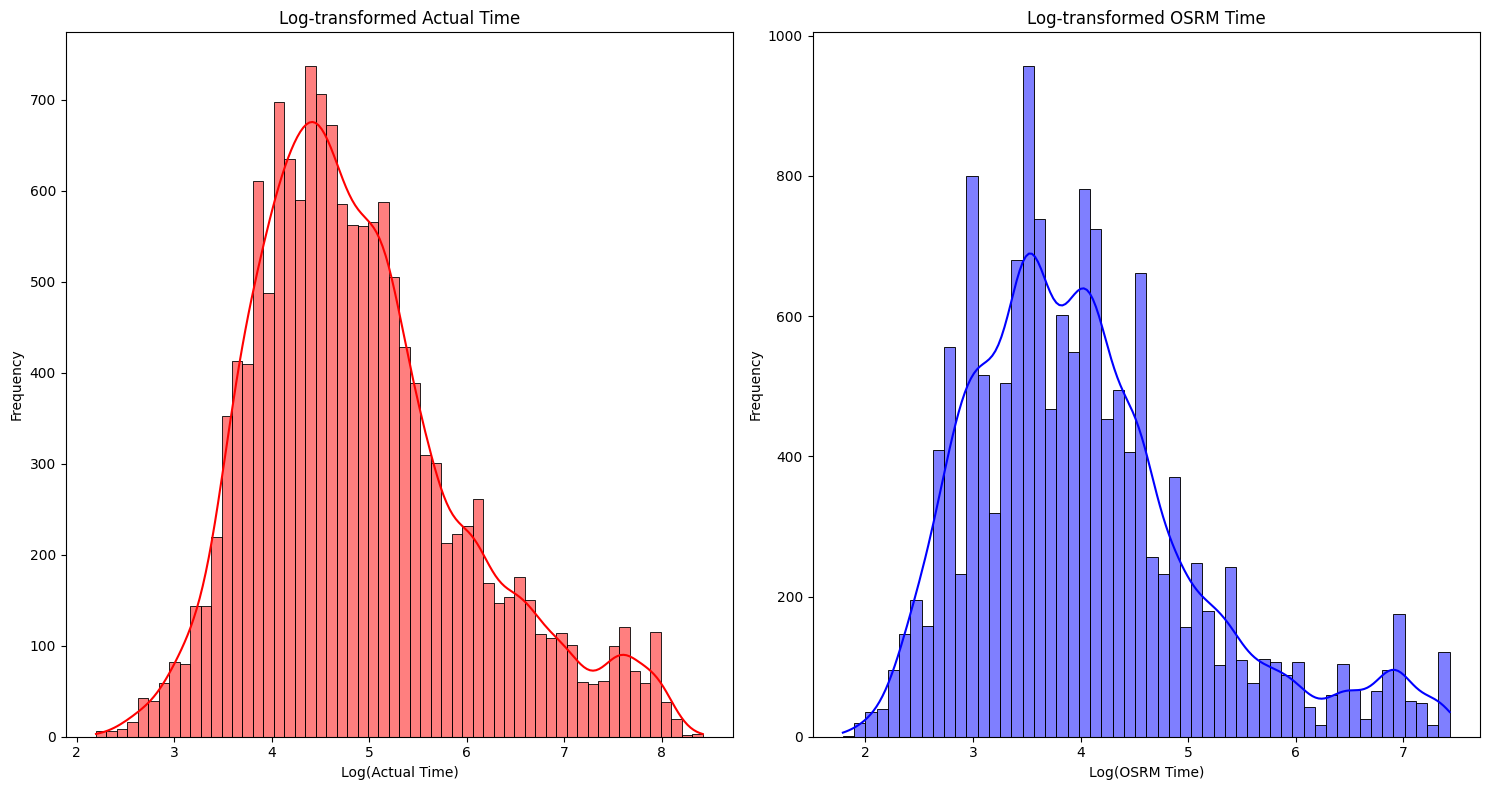

In [64]:
actual_time_log = np.log(df_1['actual_time'])
osrm_time_log = np.log(df_1['osrm_time'])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(x=actual_time_log, kde=True, color='red', alpha=0.5)
plt.title('Log-transformed Actual Time')
plt.xlabel('Log(Actual Time)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(x=osrm_time_log, kde=True, color='blue', alpha=0.5)
plt.title('Log-transformed OSRM Time')
plt.xlabel('Log(OSRM Time)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

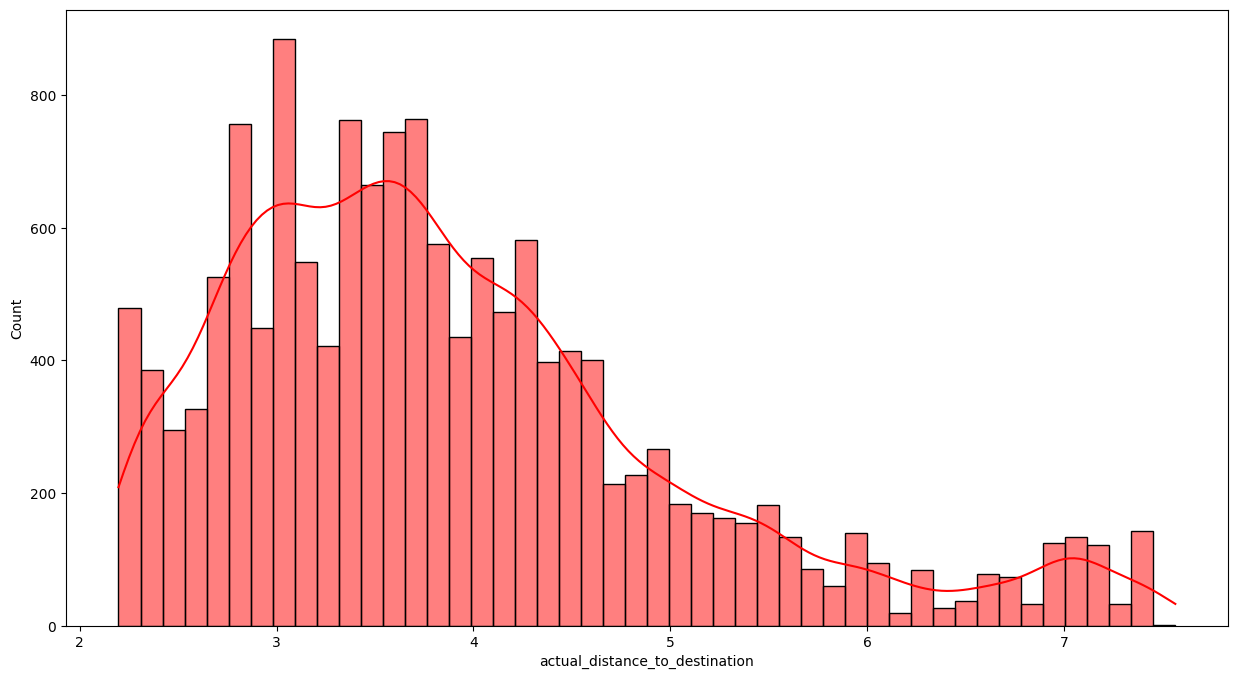

In [62]:
plt.figure(figsize=(15,8))
actual_distance_log =np.log(df_1['actual_distance_to_destination'])
sns.histplot(x=actual_distance_log, kde=True, color='red', alpha=0.5)
plt.show()

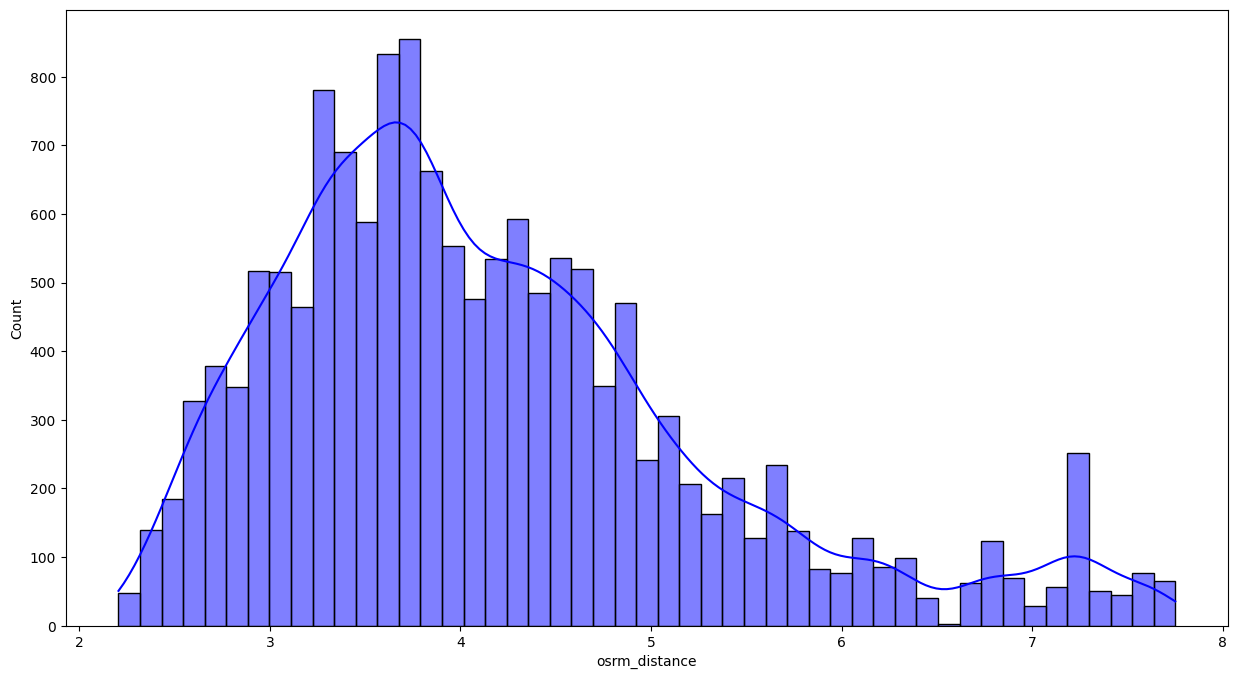

In [66]:
plt.figure(figsize=(15,8))
osrm_distance_log =np.log(df_1['osrm_distance'])
sns.histplot(x=osrm_distance_log, kde=True, color='blue', alpha=0.5)
plt.show()

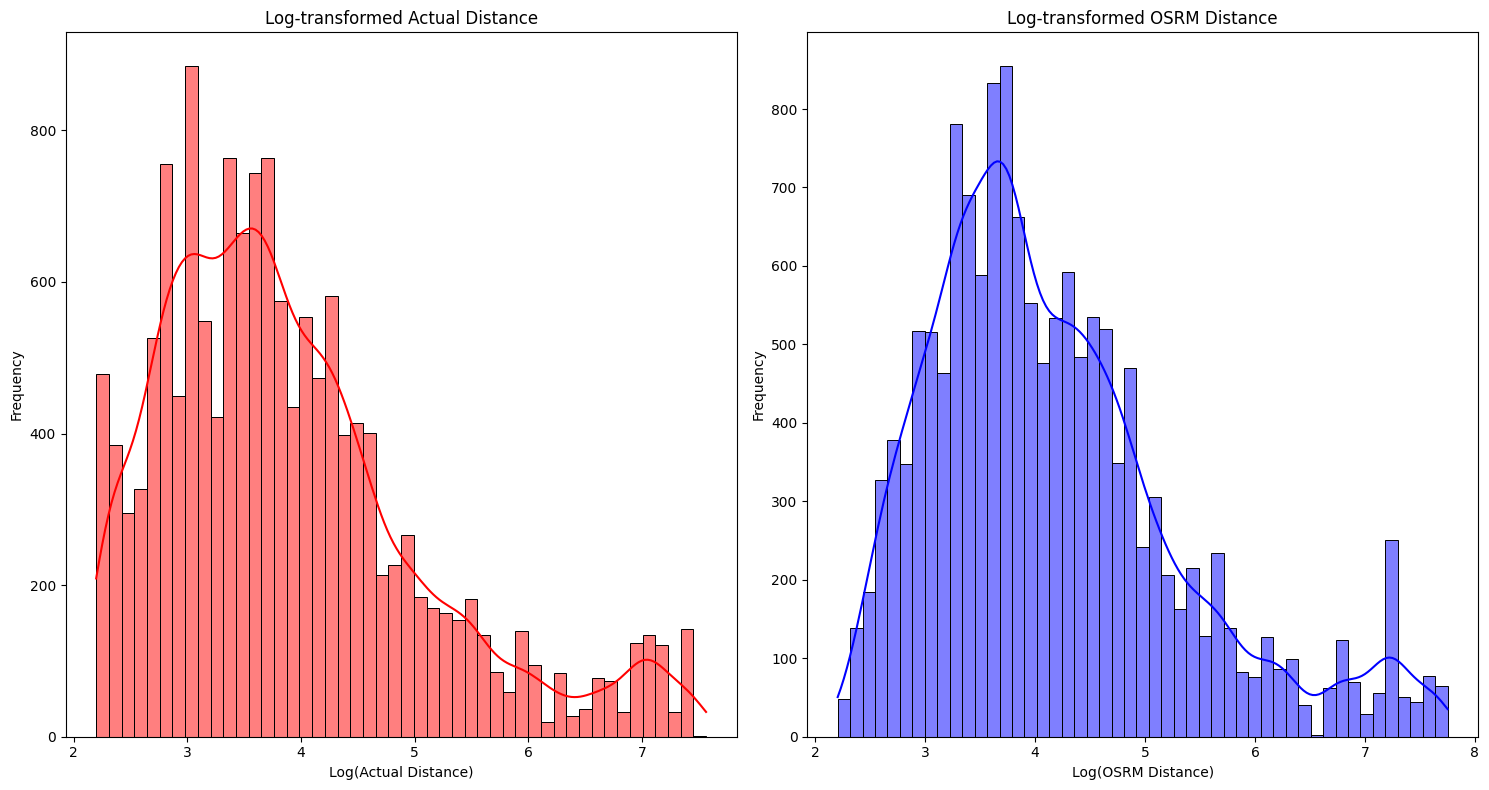

In [65]:
actual_distance_log = np.log(df_1['actual_distance_to_destination'])
osrm_time_log = np.log(df_1['osrm_distance'])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(x=actual_distance_log, kde=True, color='red', alpha=0.5)
plt.title('Log-transformed Actual Distance')
plt.xlabel('Log(Actual Distance)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(x=osrm_distance_log, kde=True, color='blue', alpha=0.5)
plt.title('Log-transformed OSRM Distance')
plt.xlabel('Log(OSRM Distance)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()